<a href="https://colab.research.google.com/github/akshatsirohi/Data-Analysis-by-Akshat-Sirohi/blob/main/Bank_customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W

Downloading...
From: https://drive.google.com/uc?id=1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 106MB/s]


In [ ]:
df = pd.read_csv('Bank-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
#dropping extra columns (not useful for DA)

df_full = df.copy()

df.drop(columns = ['RowNumber', 'Surname', 'CustomerId'], inplace = True)

#1. Descriptive Statistics

In [ ]:
df.shape

(10000, 15)

In [ ]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
# replacing male with 1, and female with 0
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [ ]:
df.dtypes

CreditScore             int64
Geography              object
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [ ]:
# checking for null values

df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [ ]:
# getting list of columns with less than 10 unique values
cardinality_columns = [col for col in df.columns if df[col].nunique() < 10]
cardinality_columns

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type']

In [ ]:
for col in cardinality_columns:
  print(f'\nNumber of Unique values in {col} ----->> {df[col].nunique()}\n')
  print(f'{col} ----->> {df[col].unique()}\n')
  print(df[col].value_counts())
  print('-'*55)
  print('-'*55)


Number of Unique values in Geography ----->> 3

Geography ----->> ['France' 'Spain' 'Germany']

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
-------------------------------------------------------
-------------------------------------------------------

Number of Unique values in Gender ----->> 2

Gender ----->> [0 1]

Gender
1    5457
0    4543
Name: count, dtype: int64
-------------------------------------------------------
-------------------------------------------------------

Number of Unique values in NumOfProducts ----->> 4

NumOfProducts ----->> [1 3 2 4]

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
-------------------------------------------------------
-------------------------------------------------------

Number of Unique values in HasCrCard ----->> 2

HasCrCard ----->> [1 0]

HasCrCard
1    7055
0    2945
Name: count, dtype: int64
-------------------------------------------------------
----------

In [ ]:
# Calculate mean, median, and mode for - CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, and Points Earned.

for col in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']:
  mean = df[col].mean()
  median = df[col].median()
  mode = df[col].mode()[0]
  min = df[col].min()
  max = df[col].max()
  print(f'\nMean for {col}: {mean.round(1)}')
  print(f'Median for {col}: {median.round(1)}')
  print(f'Mode for {col}: {mode.round(1)}')
  print(f'Min for {col}: {min.round(1)}')
  print(f'Max for {col}: {max.round(1)}\n')
  print('-'*35)


Mean for CreditScore: 650.5
Median for CreditScore: 652.0
Mode for CreditScore: 850
Min for CreditScore: 350
Max for CreditScore: 850

-----------------------------------

Mean for Age: 38.9
Median for Age: 37.0
Mode for Age: 37
Min for Age: 18
Max for Age: 92

-----------------------------------

Mean for Tenure: 5.0
Median for Tenure: 5.0
Mode for Tenure: 2
Min for Tenure: 0
Max for Tenure: 10

-----------------------------------

Mean for Balance: 76485.9
Median for Balance: 97198.5
Mode for Balance: 0.0
Min for Balance: 0.0
Max for Balance: 250898.1

-----------------------------------

Mean for NumOfProducts: 1.5
Median for NumOfProducts: 1.0
Mode for NumOfProducts: 1
Min for NumOfProducts: 1
Max for NumOfProducts: 4

-----------------------------------

Mean for EstimatedSalary: 100090.2
Median for EstimatedSalary: 100193.9
Mode for EstimatedSalary: 24924.9
Min for EstimatedSalary: 11.6
Max for EstimatedSalary: 199992.5

-----------------------------------

Mean for Satisfaction

In [ ]:
## nesting check function
## this function will take DataFrame as input and column name of that data frame and will return if nesting exist in that column

def nesting_check(df, column_name):
  if any(df[column_name].str.contains(',') == True):
    return f'{column_name} ------>> Nesting Exist'
  else:
    return f'{column_name} ----->> Nesting DO NOT Exist'

In [ ]:
for i in df.select_dtypes(include = 'object').columns:
  print(nesting_check(df, i))

Geography ----->> Nesting DO NOT Exist
Card Type ----->> Nesting DO NOT Exist


#2. Exploratory Data Analysis (EDA)

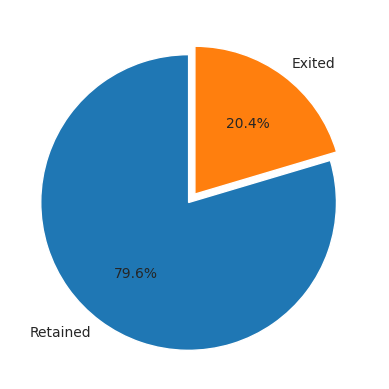

In [ ]:
#pie plot
pie_values = round(df['Exited'].value_counts(normalize = True)*100,1).values

labels = ['Retained', 'Exited']

keys = ['Retained', 'Exited']
palette_color = sns.color_palette('tab10')

plt.pie(x = pie_values, labels=keys, colors=palette_color, autopct='%0.1f%%', explode= (0.07, 0.001), startangle=90)
plt.show()

Approximately 20% of the customers have churned. Consequently, a baseline model might predict that 20% of customers will churn. Given that this is a relatively small percentage, it is crucial that the selected model accurately identifies this 20% of customers. This is important for the bank, as identifying and retaining these customers is a higher priority than accurately predicting those who remain.

#### **Distribution Analysis:** Analyze the distribution of key numerical variables using histograms and box plots to understand the spread and central tendency.

<Axes: >

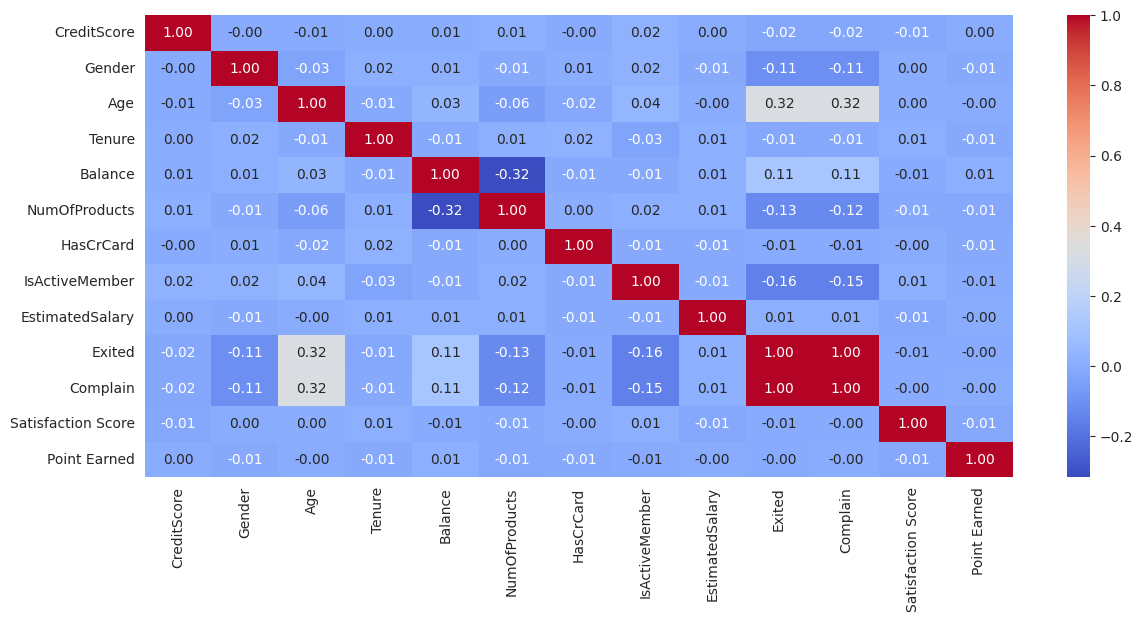

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(method = 'spearman', numeric_only = True), annot = True, cmap = 'coolwarm', fmt=".2f")

key observations from the heatmap:

1. **Age and Exited**:
   - There is a moderate positive correlation (0.32) between Age and Exited, indicating that older customers are more likely to exit.

2. **Age and Complain**:
   - Age also shows a similar moderate positive correlation (0.32) with Complain, suggesting that older customers are more likely to lodge complaints.

3. **Balance and NumOfProducts**:
   - There is a moderate negative correlation (-0.32) between Balance and NumOfProducts, implying that customers with higher balances tend to have fewer products.

4. **Complain and Exited**:
   - There is a high positive correlation (1) between Complain and Exited, indicating that customers who have complained are very likely to exit.

5. **IsActiveMember and Exited**:
   - There is a moderate negative correlation (-0.16) between IsActiveMember and Exited, suggesting that active members are less likely to exit.

6. **IsActiveMember and Complain**:
   - IsActiveMember also shows a moderate negative correlation (-0.15) with Complain, implying that active members are less likely to complain.

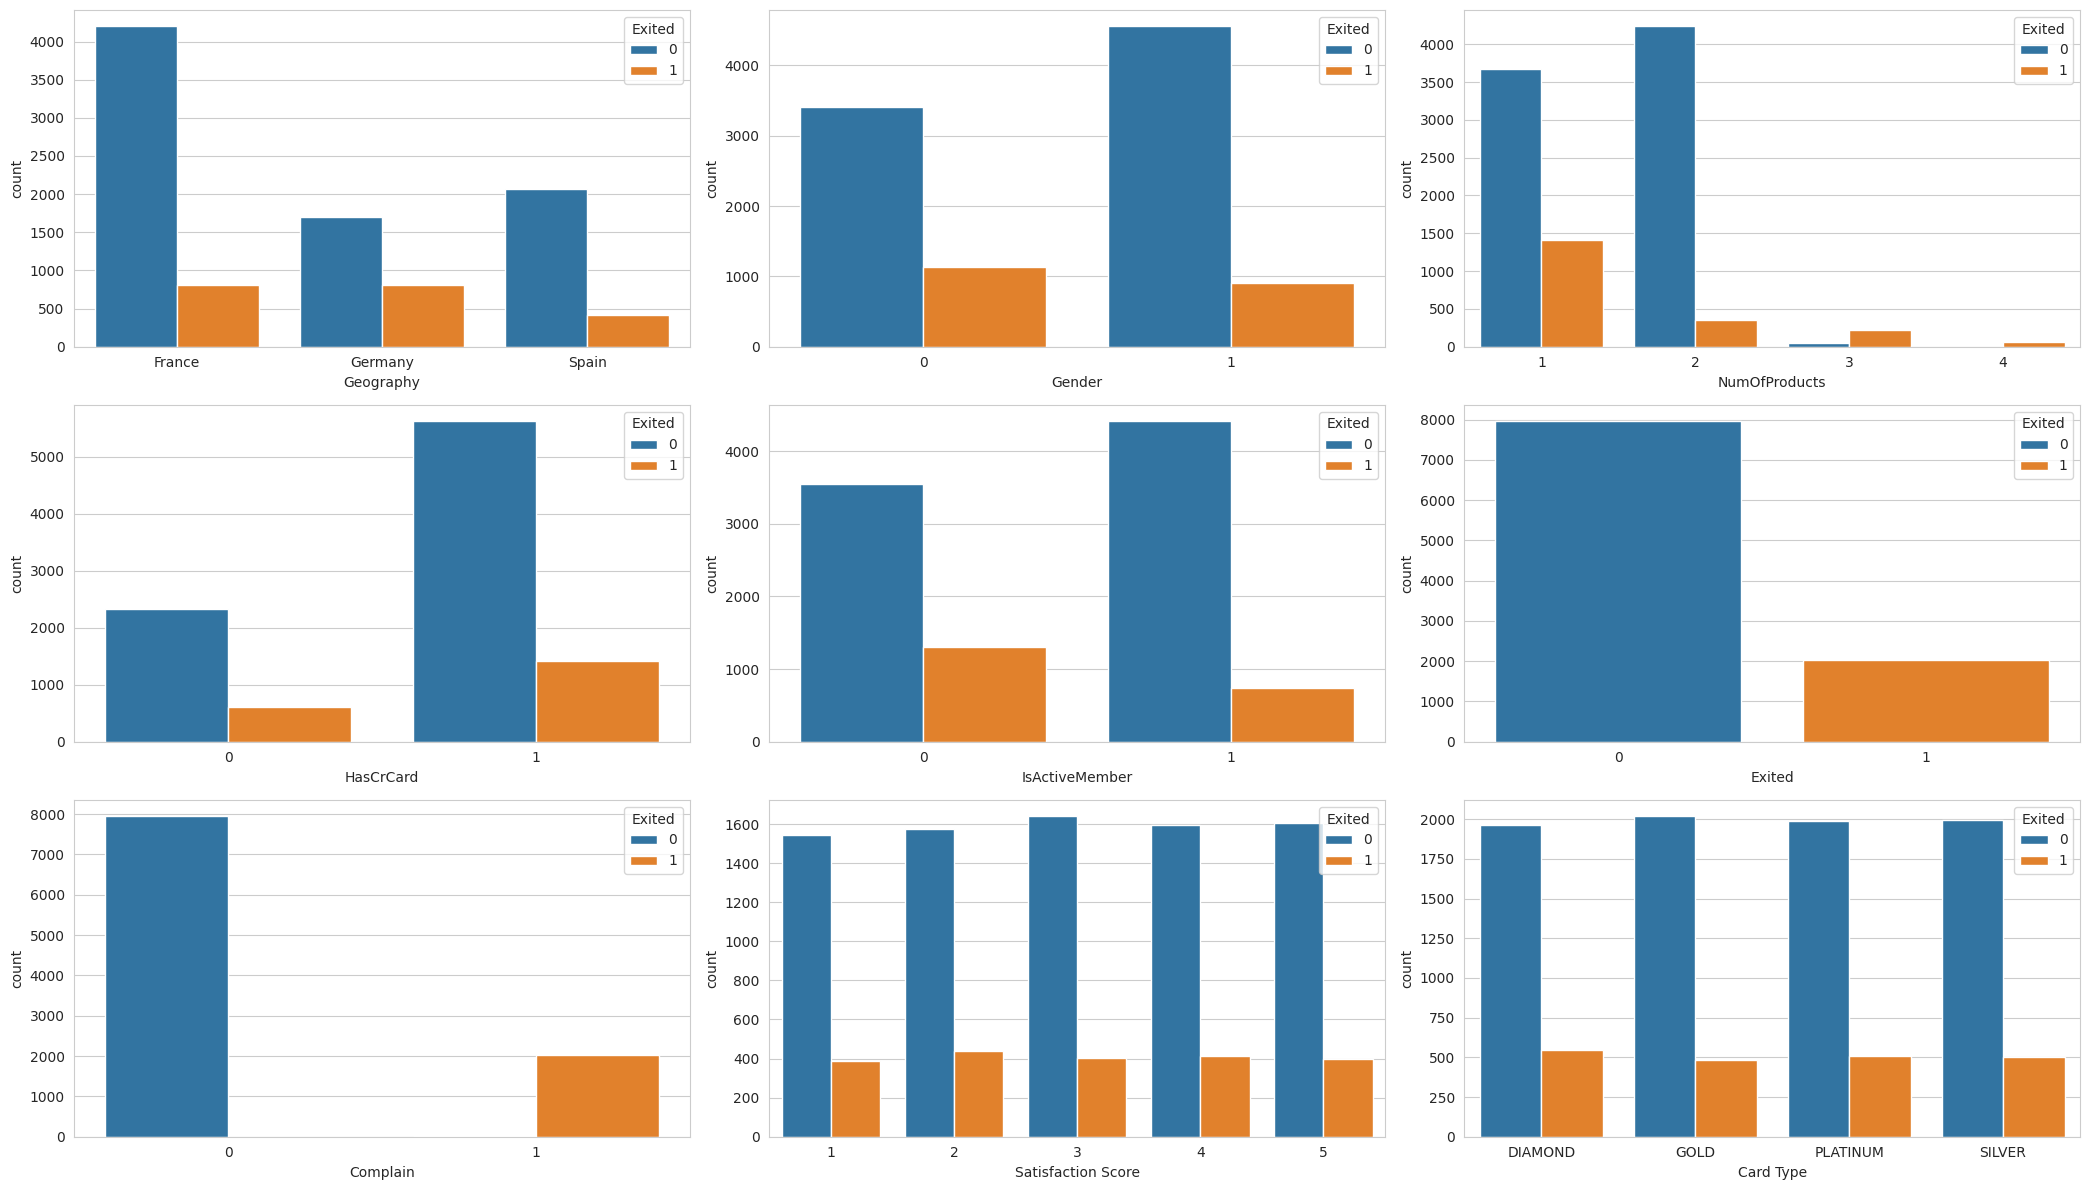

In [ ]:
#plotting cardinality_columns count and Exited as hue

sns.set_style('whitegrid')

# Create subplots
num_rows, num_col = 3, 3
fig, axes = plt.subplots(num_rows, num_col,figsize=(num_col*7, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(cardinality_columns):
  sorted_order = sorted(df[col].astype(str).unique())
  sns.countplot(data=df, x = col, hue = 'Exited', ax=axes[i], order = sorted_order)
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Turn off the visibility of unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

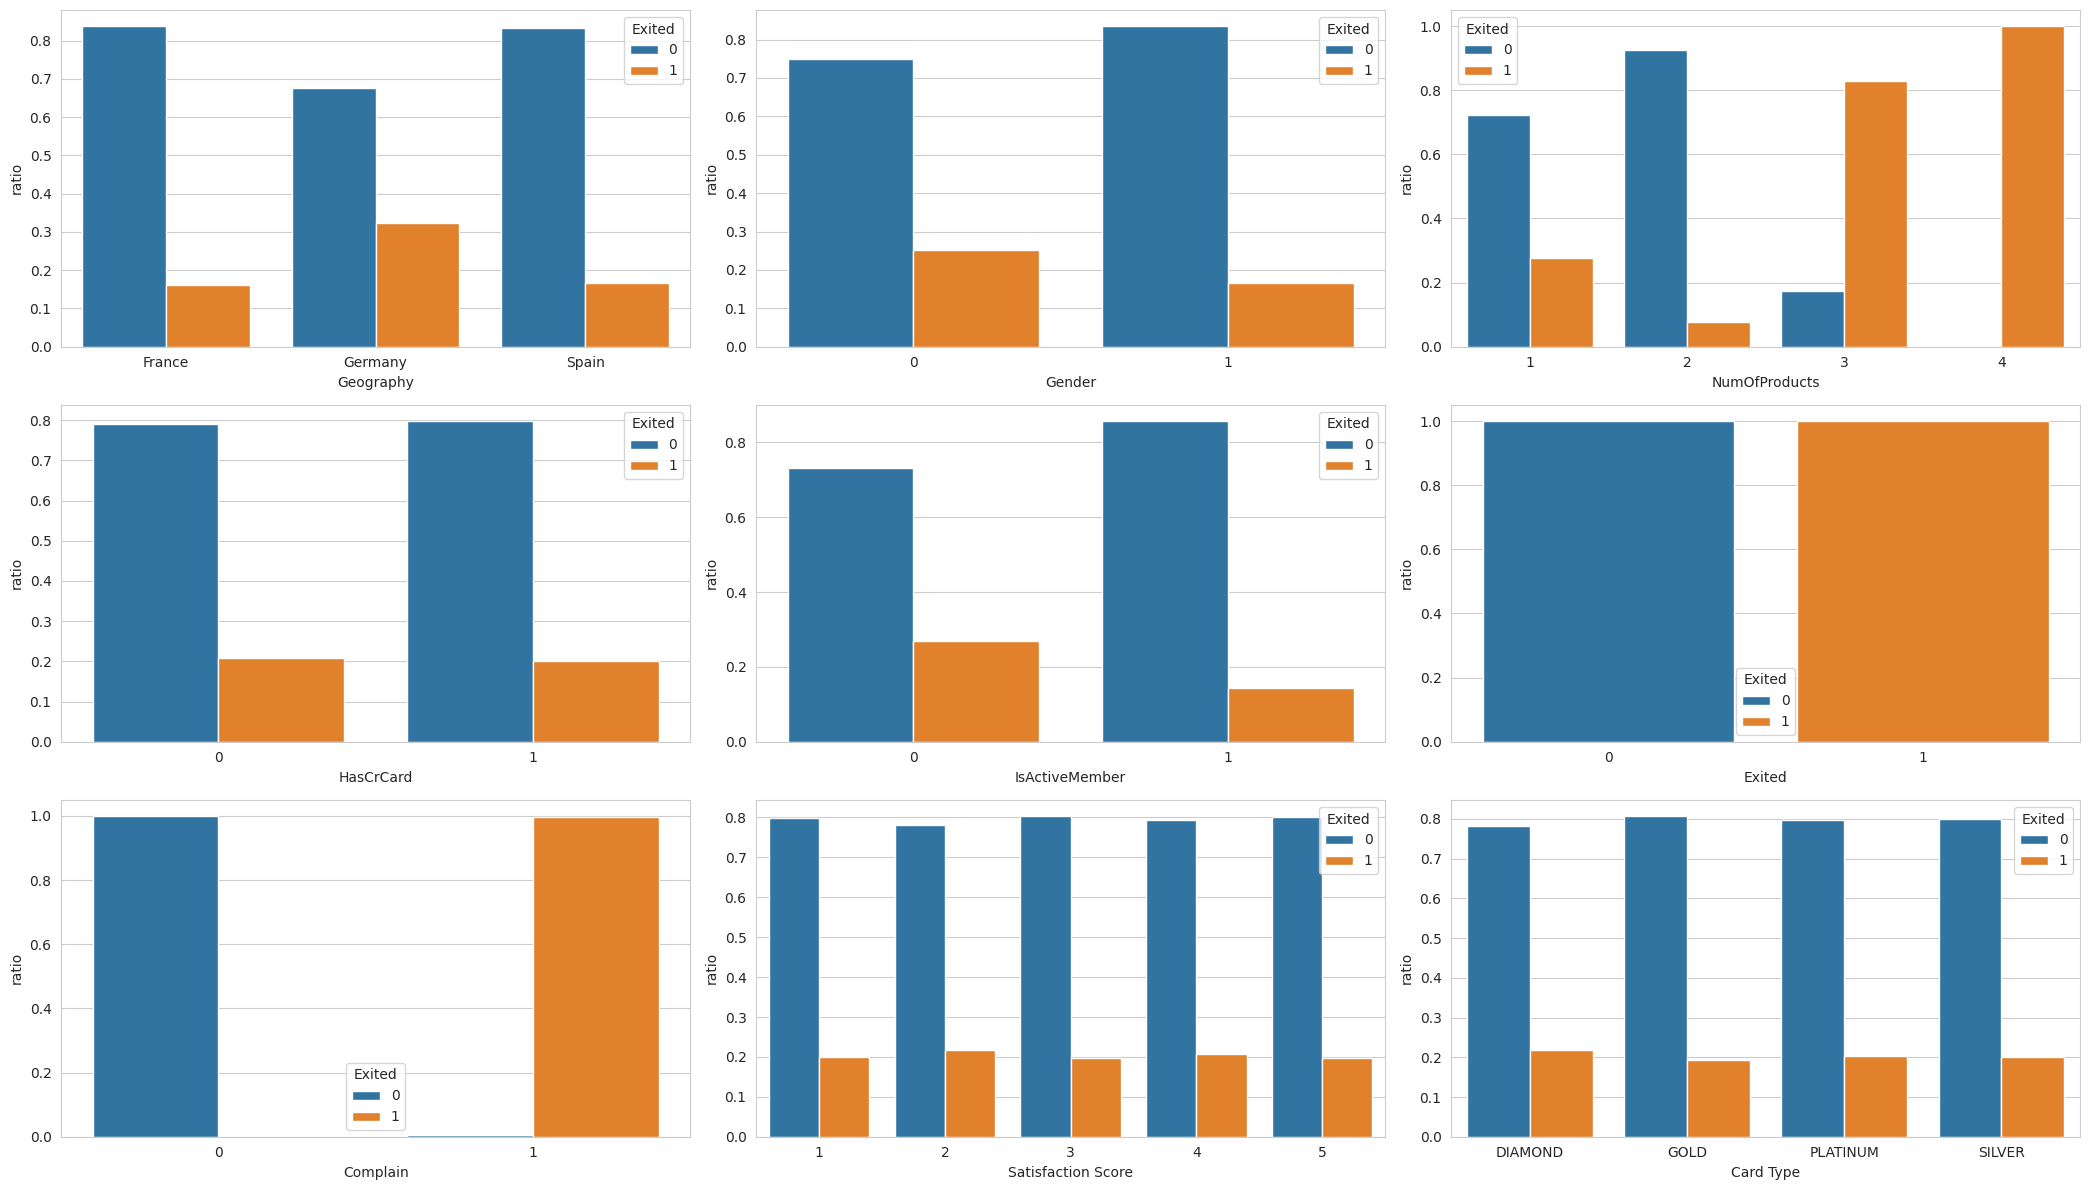

In [ ]:
#plotting cardinality_columns count and Exited as hue in ratio

# getting the ratio

sns.set_style('whitegrid')

# Create subplots
num_rows, num_col = 3, 3
fig, axes = plt.subplots(num_rows, num_col,figsize=(num_col*7, 4*num_rows))
axes = axes.flatten()

for i,col in enumerate(cardinality_columns):
  dfg = df.groupby(col)['Exited'].value_counts(normalize=True).reset_index(name='ratio')

  sorted_order = sorted(df[col].astype(str).unique())
  sns.barplot(x=col, y='ratio', hue='Exited', data=dfg, ax = axes[i], order = sorted_order)
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Turn off the visibility of unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- France have highest number of customers who have not churned.
- Germany have highest rate of churn.
- Spain and France have almost same churn rate.

- Females have higher churn rate.

- most of the customers have 1 or 2 NumOfProducts
- churn rate for customers having 1 NumOfProducts is higher than that of 2 NumOfProducts
- customers with 3 and 4 NumOfProducts are very less but their churn rate is very high.

- Number of customers who have card is higher than that of who don't have.
- Churn rate for the customers who have card and those who don't have is almost same.

- Churn Rate for the inactive customers is higher than that of active customers.

- Most of the customers who have complained have churned.

- Churn rate for different satisfaction score is same.

- Chur rate for different card type is same.


In [ ]:
continous_col=[]

for col in df.columns:
  uniques = df[col].nunique()
  if uniques >10:
    continous_col.append(col)
print(continous_col)

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']


In [ ]:
for col in continous_col:
  df[f'{col}_bins'] = pd.cut(df[col], bins=6)

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Card Type,Point Earned,CreditScore_bins,Age_bins,Tenure_bins,Balance_bins,EstimatedSalary_bins,Point Earned_bins
0,619,France,0,42,2,0.00,1,1,1,101348.88,...,1,2,DIAMOND,464,"(600.0, 683.333]","(30.333, 42.667]","(1.667, 3.333]","(-250.898, 41816.348]","(100002.03, 133332.18]","(412.667, 559.5]"
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,...,1,3,DIAMOND,456,"(600.0, 683.333]","(30.333, 42.667]","(-0.01, 1.667]","(83632.697, 125449.045]","(100002.03, 133332.18]","(412.667, 559.5]"
2,502,France,0,42,8,159660.80,3,1,0,113931.57,...,1,3,DIAMOND,377,"(433.333, 516.667]","(30.333, 42.667]","(6.667, 8.333]","(125449.045, 167265.393]","(100002.03, 133332.18]","(265.833, 412.667]"
3,699,France,0,39,1,0.00,2,0,0,93826.63,...,0,5,GOLD,350,"(683.333, 766.667]","(30.333, 42.667]","(-0.01, 1.667]","(-250.898, 41816.348]","(66671.88, 100002.03]","(265.833, 412.667]"
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,...,0,5,GOLD,425,"(766.667, 850.0]","(42.667, 55.0]","(1.667, 3.333]","(125449.045, 167265.393]","(66671.88, 100002.03]","(412.667, 559.5]"


In [ ]:
continous_bin_col = []
for col in continous_col:
  continous_bin_col.append(f'{col}_bins')

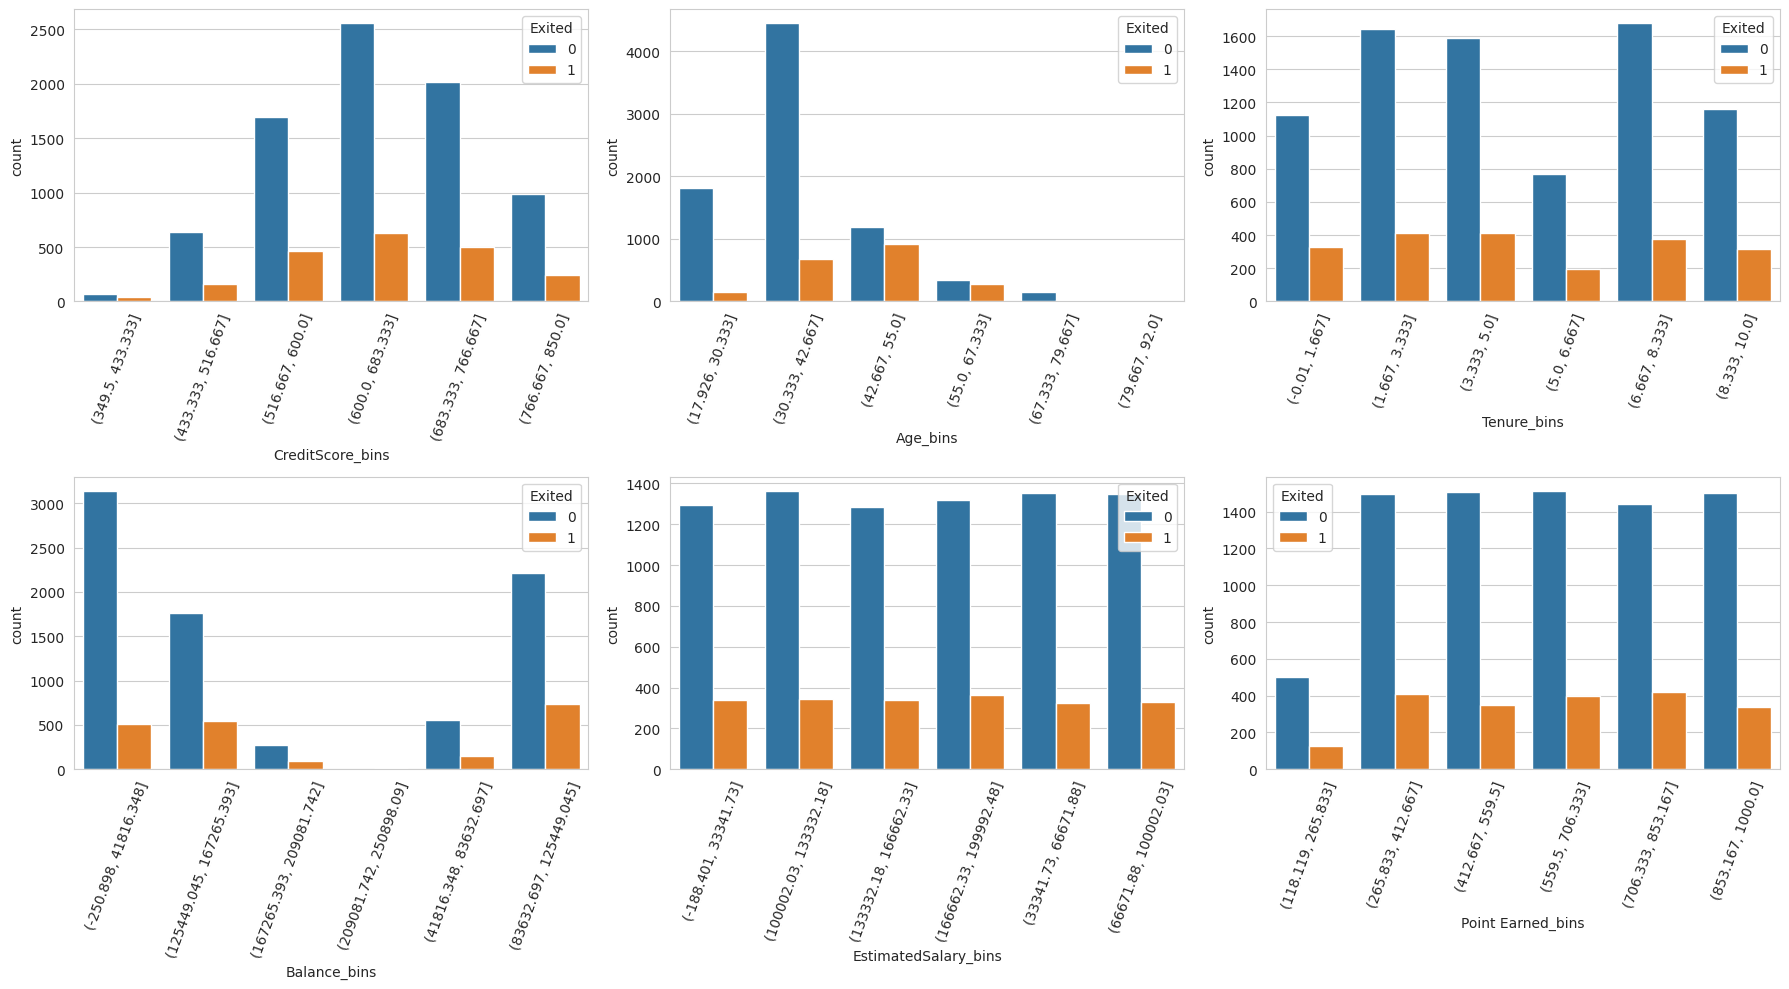

In [ ]:
#plotting continous_bin_col count and Exited as hue

# Create subplots

num_rows, num_col = 2, 3
fig, axes = plt.subplots(num_rows, num_col,figsize=(num_col*6, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(continous_bin_col):
  sorted_order = sorted(df[col].astype('str').unique())
  sns.countplot(data=df, x = col, hue = 'Exited', ax = axes[i], order = sorted_order)
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=70)

plt.tight_layout()
plt.show()

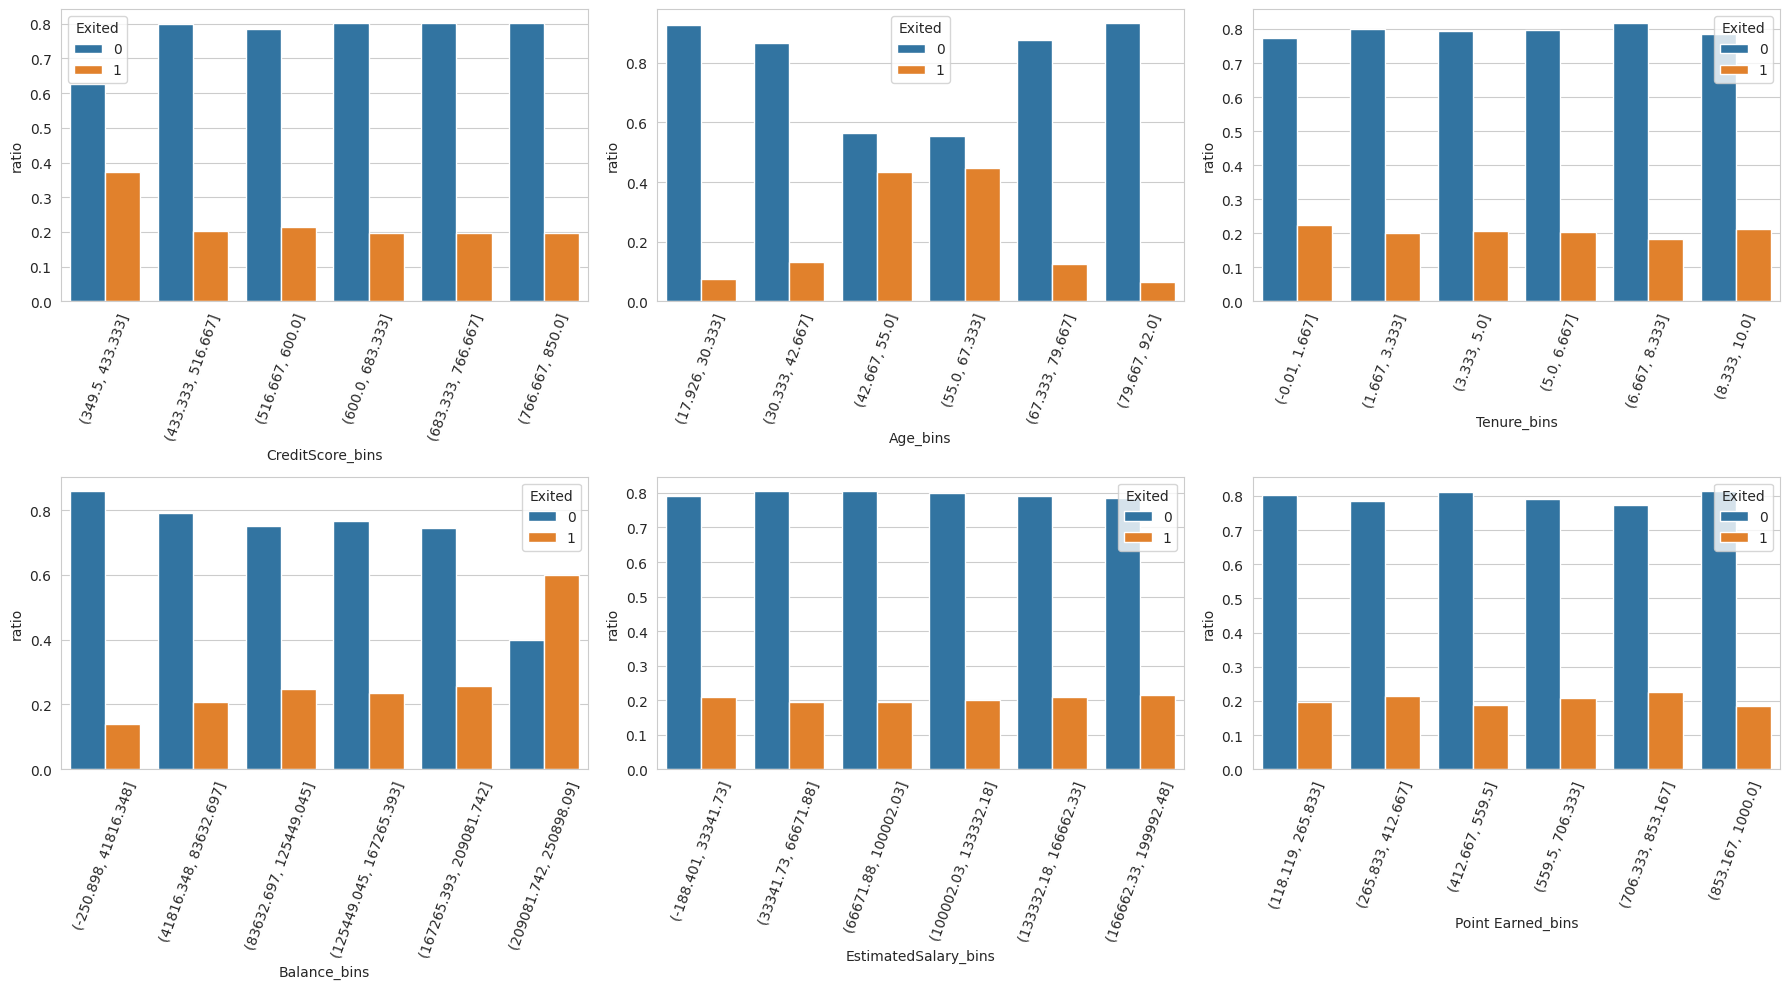

In [ ]:
#plotting continous_bin_col count and Exited as hue

# Create subplots
num_rows, num_col = 2, 3
fig, axes = plt.subplots(num_rows, num_col,figsize=(num_col*6, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(continous_bin_col):
  dfg = df.groupby(col)['Exited'].value_counts(normalize=True).reset_index(name='ratio')
  sorted_order = sorted(df[col].unique())
  sns.barplot(x=col, y='ratio', hue='Exited', data=dfg, ax = axes[i], order = sorted_order)
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=70)

plt.tight_layout()
plt.show()

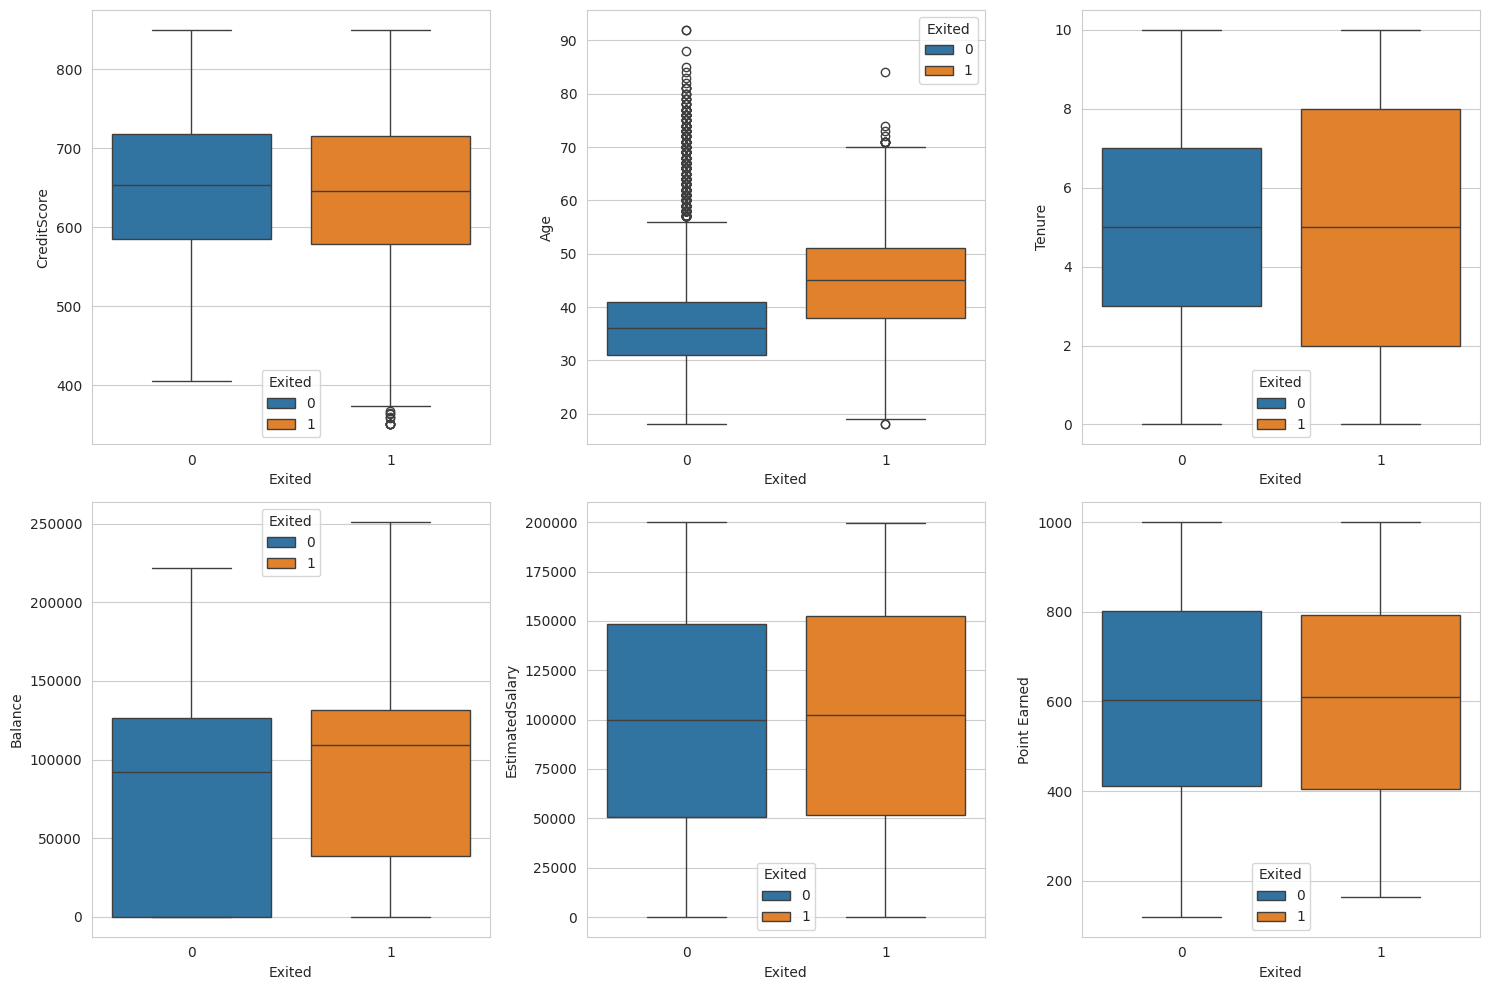

In [ ]:
num_rows, num_col = 2, 3
fig, axes = plt.subplots(num_rows, num_col, figsize=(num_col*5, num_rows*5))
axes = axes.flatten()

# Create the boxplot
for i, col in enumerate(continous_col):
  sns.boxplot(data=df, x='Exited', y=col, hue='Exited', ax = axes[i])


plt.tight_layout()
plt.show()

- Very few customers have credit score between 359 - 433 and churn rate of those is vey high.
- Churn rate is constant for customers having credit score greater than 433.

- Most of the customers lie between the age of 30 to 42.
- Churn rate his highest for the age between 37 - 55.
- Churn rate is almost constant for different tenure duration.

- Most of the customers have balance below 167265 and between 83632 - 125449
- Median of balance of customers who have exited is more than 1,00,000 while for those who have not exited is less than 1,00,000.

- Churn rate for different estimated salary is almost same.

- Churn rate for different levels of point Earned is almost same.


In [ ]:
# Removing Outliers

dfg = df_full.copy()

dfg_exited = dfg[dfg['Exited'] == 1]
dfg_not_exited = dfg[dfg['Exited'] == 0]

for col in continous_col:
  dfg_exited[col] = np.clip(dfg_exited[col], np.percentile(dfg_exited[col], 2), np.percentile(dfg_exited[col], 99))
  dfg_not_exited[col] = np.clip(dfg_not_exited[col], np.percentile(dfg_not_exited[col], 2), np.percentile(dfg_not_exited[col], 93))

dfg.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
dfg_merged = pd.concat([dfg_exited, dfg_not_exited])
dfg_merged.shape

(10000, 18)

In [ ]:
continous_col.append('RowNumber')

In [ ]:
dfg_merged = pd.merge(dfg, dfg_merged[continous_col], on='RowNumber', how='inner')
dfg_merged.head()

,RowNumber,CustomerId,Surname,CreditScore_x,Geography,Gender,Age_x,Tenure_x,Balance_x,NumOfProducts,...,Complain,Satisfaction Score,Card Type,Point Earned_x,CreditScore_y,Age_y,Tenure_y,Balance_y,EstimatedSalary_y,Point Earned_y
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,2,DIAMOND,464,619,42,2,0.00,101348.88,464.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,3,DIAMOND,456,608,41,1,83807.86,112542.58,456.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,3,DIAMOND,377,502,42,8,159660.80,113931.57,377.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,5,GOLD,350,699,39,1,0.00,93826.63,350.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,5,GOLD,425,797,43,2,125510.82,79084.10,425.0


In [ ]:
dfg_merged.drop(columns=['CreditScore_x',	'Geography',	'Gender',	'Age_x',	'Tenure_x',	'Balance_x', 'EstimatedSalary_x', 'Point Earned_x'], inplace=True)
dfg_merged.head()

,RowNumber,CustomerId,Surname,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,CreditScore_y,Age_y,Tenure_y,Balance_y,EstimatedSalary_y,Point Earned_y
0,1,15634602,Hargrave,1,1,1,1,1,2,DIAMOND,619,42,2,0.00,101348.88,464.0
1,2,15647311,Hill,1,0,1,0,1,3,DIAMOND,608,41,1,83807.86,112542.58,456.0
2,3,15619304,Onio,3,1,0,1,1,3,DIAMOND,502,42,8,159660.80,113931.57,377.0
3,4,15701354,Boni,2,0,0,0,0,5,GOLD,699,39,1,0.00,93826.63,350.0
4,5,15737888,Mitchell,1,1,1,0,0,5,GOLD,797,43,2,125510.82,79084.10,425.0


In [ ]:
continous_col.remove('RowNumber')

In [ ]:
for col in continous_col:

  dfg_merged.rename(columns={f'{col}_y': col}, inplace=True)

In [ ]:
dfg_merged.head()

,RowNumber,CustomerId,Surname,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,CreditScore,Age,Tenure,Balance,EstimatedSalary,Point Earned
0,1,15634602,Hargrave,1,1,1,1,1,2,DIAMOND,619,42,2,0.00,101348.88,464.0
1,2,15647311,Hill,1,0,1,0,1,3,DIAMOND,608,41,1,83807.86,112542.58,456.0
2,3,15619304,Onio,3,1,0,1,1,3,DIAMOND,502,42,8,159660.80,113931.57,377.0
3,4,15701354,Boni,2,0,0,0,0,5,GOLD,699,39,1,0.00,93826.63,350.0
4,5,15737888,Mitchell,1,1,1,0,0,5,GOLD,797,43,2,125510.82,79084.10,425.0


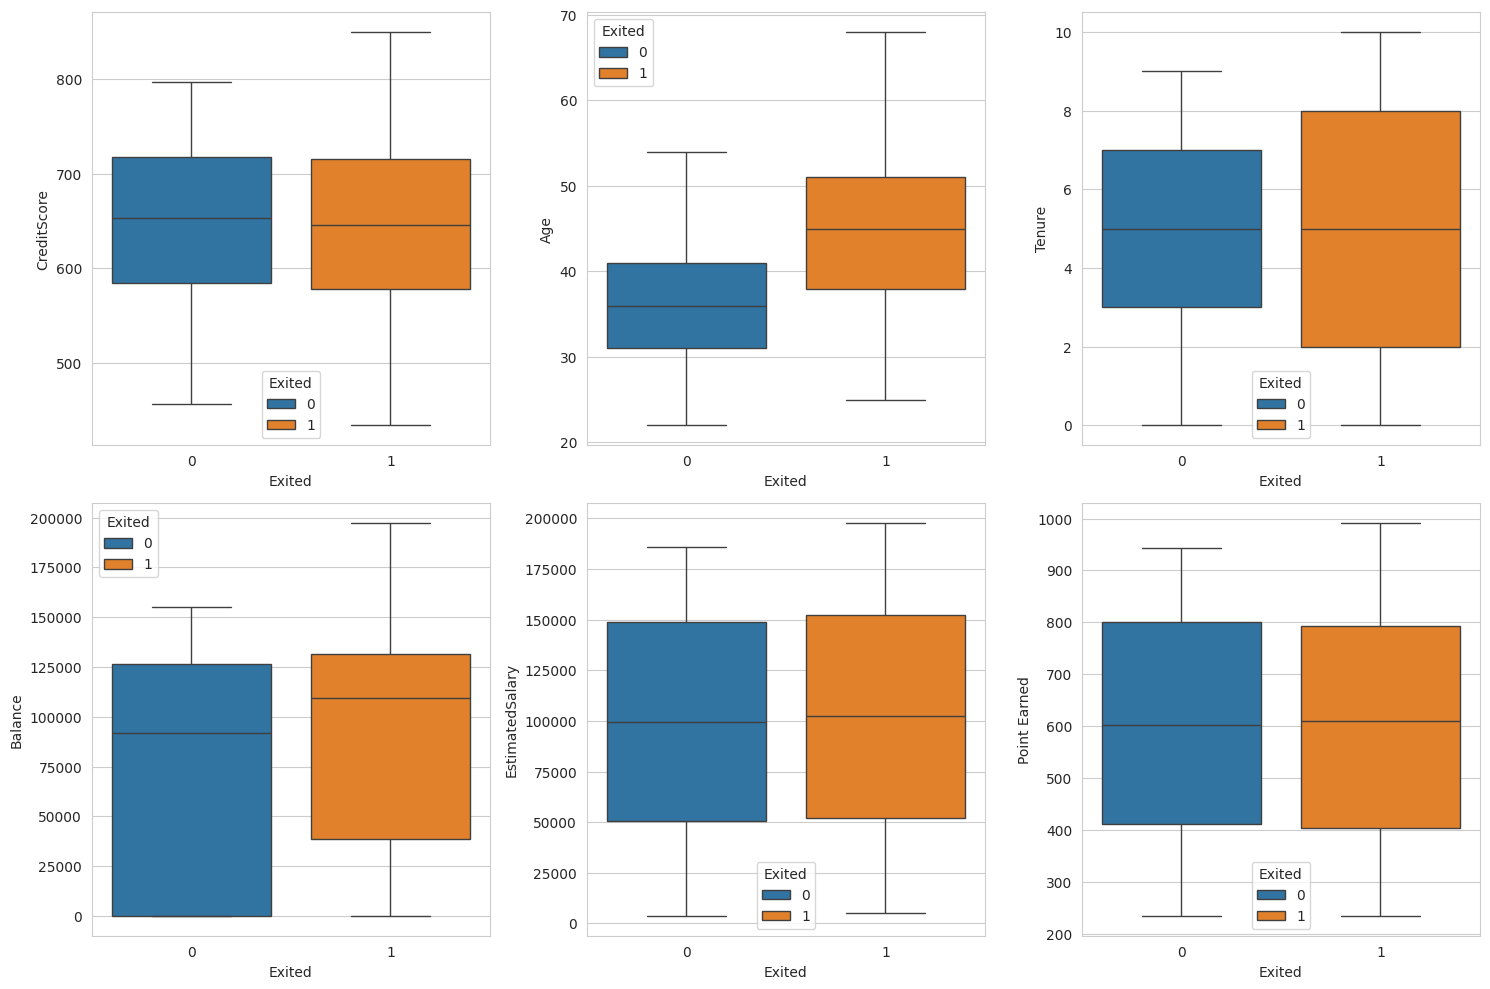

In [ ]:
num_rows, num_col = 2, 3
fig, axes = plt.subplots(num_rows, num_col, figsize=(num_col*5, num_rows*5))
axes = axes.flatten()

# Create the boxplot
for i, col in enumerate(continous_col):
  sns.boxplot(data=dfg_merged, x='Exited', y=col, hue='Exited', ax = axes[i])


plt.tight_layout()
plt.show()

In [ ]:
# Test for mean [continous_col] of exited and not_exited customers

# import ttest_ind
from scipy.stats import ttest_ind

alpha = 0.05

for col in continous_col:
  exited_col = dfg_merged[dfg_merged['Exited'] == 1][col]
  not_exited_col = dfg_merged[dfg_merged['Exited'] == 0][col]

  _, p_value = ttest_ind(exited_col, not_exited_col, alternative = 'greater')
  print(f'For {col} - P Value is : {p_value}')

  if p_value < alpha:
    print(f'Reject H0, mean {col} of those who have exited is greater than those stayed\n')
  else:
    print(f'Fail to Reject H0, mean {col} of those who have exited is equal or less than those stayed\n')
  print('='*100)

For CreditScore - P Value is : 0.9513736103744698
Fail to Reject H0, mean CreditScore of those who have exited is equal or less than those stayed

For Age - P Value is : 1.0309212884193483e-307
Reject H0, mean Age of those who have exited is greater than those stayed

For Tenure - P Value is : 0.7579778812293003
Fail to Reject H0, mean Tenure of those who have exited is equal or less than those stayed

For Balance - P Value is : 1.333115498689835e-37
Reject H0, mean Balance of those who have exited is greater than those stayed

For EstimatedSalary - P Value is : 0.05052924474455725
Fail to Reject H0, mean EstimatedSalary of those who have exited is equal or less than those stayed

For Point Earned - P Value is : 0.5391603866232101
Fail to Reject H0, mean Point Earned of those who have exited is equal or less than those stayed



In [ ]:
#import chi2 test
from scipy.stats import chi2_contingency

alpha = 0.05

for col in cardinality_columns:
  contingency_table = pd.crosstab(df[col], df['Exited'])
  p_value = chi2_contingency(contingency_table)[1]

  print(f'{col} :')

  print(f'P Value for {col} is : {p_value}')

  if p_value < alpha:
    print(f'Reject H0, {col} impacts churn\n')
  else:
    print(f"Fail to Reject H0, {col} doesn't impact churn\n")

  print('='*60)

Geography :
P Value for Geography is : 5.245736109572763e-66
Reject H0, Geography impacts churn

Gender :
P Value for Gender is : 2.9253677618642e-26
Reject H0, Gender impacts churn

NumOfProducts :
P Value for NumOfProducts is : 0.0
Reject H0, NumOfProducts impacts churn

HasCrCard :
P Value for HasCrCard is : 0.5026181509009862
Fail to Reject H0, HasCrCard doesn't impact churn

IsActiveMember :
P Value for IsActiveMember is : 6.153167438113408e-55
Reject H0, IsActiveMember impacts churn

Exited :
P Value for Exited is : 0.0
Reject H0, Exited impacts churn

Complain :
P Value for Complain is : 0.0
Reject H0, Complain impacts churn

Satisfaction Score :
P Value for Satisfaction Score is : 0.43336497327743106
Fail to Reject H0, Satisfaction Score doesn't impact churn

Card Type :
P Value for Card Type is : 0.16794112067810177
Fail to Reject H0, Card Type doesn't impact churn



## Satisfaction and Churn: Explore how the Satisfaction Score relates to churn, especially among those who have filed complaints.

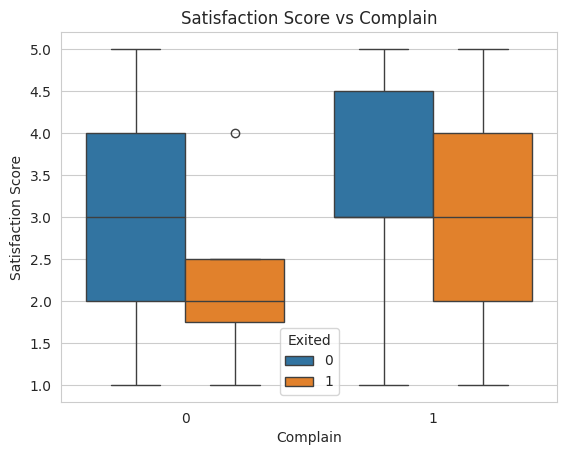

In [ ]:
sns.boxplot(data=df, x='Complain', y='Satisfaction Score', hue='Exited')
plt.title('Satisfaction Score vs Complain')
plt.show()

**Insights:**

1. The probability of churn is higher for female customers compared to male customers.
2. This indicates that female customers are deactivating their banking facilities at a higher rate than male customers.
3. Half of the customers are from France, followed by Germany and Spain.
4. Despite the significant difference in total customers between France and Germany, the churn rate for French and German customers is the same.
5. Although the number of customers from Spain and Germany is nearly equal, the churn rate in Germany is almost double that of Spain.
6. Over 70% of customers have a credit card.
7. The churn probability value for both categories is approximately 1:4.
8. Thus, having a credit card does not significantly affect customer churn.
9. Most customers have either one or two total banking products, with very few having more than two.
10. The lowest churn rate is observed among customers with only two products. There is a very high churn rate among customers with one product or more than two products.
11. Approximately equal numbers of customers are either active or inactive. However, the churn rate for inactive customers is nearly double that of active customers, indicating that inactive customers are more likely to deactivate their banking facilities.
12. The median credit score of both churned and non-churned customers is approximately equal.
13. More than 3,000 customers have an account balance of zero. Customers with a zero balance are more likely to deactivate their accounts.
14. The median value of estimated salary is approximately the same for both churn categories. Since the distribution is similar for both churn categories, no relevant inference can be made.


**Recommendations**

1. The bank can develop targeted marketing campaigns specifically tailored to female customers.
2. The bank can focus on enhancing the overall customer experience for female customers.
3. The bank can analyze the banking facilities and behaviors of customers from France and implement successful strategies in Germany.
4. The bank can encourage customers to have at least two banking products.
5. The bank can provide rewards and incentives to customers with at least two banking products.
6. The bank can offer regular communication, updates, and enhanced digital services to keep customers active with banking facilities.
7. The bank could provide a complaint box to facilitate customer communication and work on resolving issues to reduce churn rates.